# Predicting Thalassemia (Heart Disease) #

**[Github Repo](https://github.com/AnishkaFP/dsci-100-2023w1-group-029)**

### Group Details ###
Group Number: 008-29
### Members: 
- Ishaan Chakrabarty
- Anishka Fernandopulle
- Milan Wiertz
- Molly Jiang

## 1.0 Introduction ## 
Our study aims to identify the presence of heart disease in individuals, depending on various factors. We specifically focus on the Thalassemia heart disease.

Thalassemia is a “heterogenous group of inherited anemias characterized by reduced or absent biosynthesis of one or more globin chains” (Benz, 2023). It is caused by “hundreds of inherited hemoglobin gene mutations, and presentations range from asymptomatic to transfusion dependent” (Merkeley & Bolster, 2020). Genes causing the illness are present across population groups, but are most frequent in Southeastern Asia, where frequency of the disease can range as high as 30-40% (Benz & Sankaran 2023). Although not all those affected need to be treated, many require regular transfusions for survival (Foong et al., 2023). The best way to diagnose Thalassemia is hemoglobin electrophoresis, however, such method is not widely available in developing countries, where alternative methods are thus needed (Kottke-Marchant & Davis, 2012).

In such context, being able to identify patients with the highest likelihood to be affected by the disease through inexpensive and accessible tests can be instrumental in ensuring that the few hemoglobin electrophoresis tests that are available are used effectively, and ideally only on those at high risk of carrying the disease.

For our study, we will make use of a [simplified version](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset) of a [dataset by Janosi et al.](https://archive.ics.uci.edu/dataset/45/heart+disease), and archived by UC Irvine. The study contains various biographical metrics (eg. age, sex) as well as results obtained through relatively simple and inexpensive tests (eg. resting blood pressure, blood sugar levels). With the combination of these metrics. The dataset also indicates whether the person is affected by Thalassemia, which we will use to train our model.

### 1.1 Goal: ###
Our project will seek to predict heart disease in patients based on their performance in a series of easily accessible metrics with the intent of identifying patients that are likely to be affected early for further testing. 

## 2.0 Methodology ##

### 2.1 Describing the Data ###

The dataset contains 12 metrics regarding patients that were diagnosed (or not) with Thalassemia, as well as an indication of whether they developed the disease (target) and whether such development was reversible or fixed (thal). The data includes biographical information such as the sex and age of the patient, results of medical tests as well as analysis of test results (eg. whether the electrocardiogram presented any abnormalities).

Hereby each variable as well as their coding in the dataset, a description and variable types:


| Variable                           | Coding   | Description                                                 | Type          |
|------------------------------------|----------|-------------------------------------------------------------|---------------|
| Age                                | age      | Age of the patient                                         | Integer       |
| Sex                                | sex      | Sex of the patient  (0=female, 1=male)                     | Categorical, 0-1 |
| Chest pain type                    | cp       | Type of patient pain (0=typical angina, 1=atypical angina, 2=non-anginal pain, 3=asymptomatic)         | Categorical, 0-3 |
| Resting blood pressure (mmHg)      | trestbps | Blood pressure of the patient at rest                       | Integer       |
| Serum cholesterol in mg/dl         | chol     | Cholesterol level in the patient                            | Integer       |
| Fasting blood sugar > 120 mg/dl    | fbs      | Is the blood sugar level of the patient above 120 mg/dl? (0=no, 1=yes)  | Categorical, 0-1 |
| Resting electrocardiographic results | restecg  | EC result (0=regular, 1=abnormal, 2=hypertrophy)             | Categorical, 0-2 |
| Maximum heart rate achieved (bpm)  | thalach  | Heart rate achieved during exercise                          | Integer       |
| Exercise induced angina             | exang    | Did the patient suffer from angina due to exercise? (0=no, 1=yes)        | Categorical, 0-1 |
| ST depression                      | oldpeak  | ST depression induced by exercise relative to rest on the electrocardiogram | Numeric |
| ST Slope                           | slope    | The slope of the peak exercise ST segment (0=upsloping, 1=flat 2=downsloping)| Categorical, 0-2 |
| Major vessels                      | ca       | Number of major vessels colored by fluoroscopy              | Integer       |
| Thalassemia                        | thal     | Type of Thalassemia (0=not affected, 1=fixed, 2=reversible)   |Categorical, 0-2 |
| Target                             | target   | Presence of Thalassemia (0=no, 1=yes)                | Categorical, 0-1 |


Table 2.0: Variables in the dataset

## 3.0 Preliminary Exploratory Data Analysis ##

In [1]:
options(jupyter.plot_mimetypes = "image/png")

### 3.1 Load R Library ###

In [2]:
# load packages
library(tidyverse)
library(dplyr)
library(tidymodels)
library(ggplot2)

install.packages("kknn")
library(kknn)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.4     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

### 3.2 Read in the Data Set ###

In [3]:
# read data
url <- "https://raw.githubusercontent.com/AnishkaFP/dsci-100-2023w1-group-029/main/heart.csv"
heart_data_raw <- read_csv(url)
head(heart_data_raw)

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


Table 3.0: Preview of data in the dataset 

### 3.3 Clean and Wrangle into Tidy Format ###

In [4]:
# Check for Missing values
missing_values <- colSums(is.na(heart_data_raw))
print(data.frame(missing_values))

         missing_values
age                   0
sex                   0
cp                    0
trestbps              0
chol                  0
fbs                   0
restecg               0
thalach               0
exang                 0
oldpeak               0
slope                 0
ca                    0
thal                  0
target                0


Table 3.1: Missing values in dataset after tidying

The table above reveals that the data set is free from any missing values.

In [5]:
# check the variable types of each column
variable_types0 <- sapply(heart_data_raw, class)
print(data.frame(variable_types0))

         variable_types0
age              numeric
sex              numeric
cp               numeric
trestbps         numeric
chol             numeric
fbs              numeric
restecg          numeric
thalach          numeric
exang            numeric
oldpeak          numeric
slope            numeric
ca               numeric
thal             numeric
target           numeric


Table 3.2: Datatype for each variable prior to tidying

In [6]:
# mutate the data type for categorical variables as factor
heart_data_raw <- heart_data_raw |> 
                  mutate_at(vars(sex, cp, fbs, restecg, exang, slope, thal, target), as_factor)
# check the data type of mutated data
variable_types1 <- sapply(heart_data_raw, class)
print(data.frame(variable_types1))

         variable_types1
age              numeric
sex               factor
cp                factor
trestbps         numeric
chol             numeric
fbs               factor
restecg           factor
thalach          numeric
exang             factor
oldpeak          numeric
slope             factor
ca               numeric
thal              factor
target            factor


Table 3.3: Datatype for each variable after tidying

The initial data set has been transformed into a tidy format.

### 3.4 Select Numeric Variables for the Model Analysis ###

In [7]:
# select numeric variables and the target column
heart_data <- heart_data_raw |>
              select(age, trestbps, chol, thalach, oldpeak, ca, target)
head(heart_data)

age,trestbps,chol,thalach,oldpeak,ca,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
52,125,212,168,1.0,2,0
53,140,203,155,3.1,0,0
70,145,174,125,2.6,0,0
61,148,203,161,0.0,1,0
62,138,294,106,1.9,3,0
58,100,248,122,1.0,0,1


Table 3.4: Preview of variables to be used in model

### 3.5 Keep the Categorical Variable Separately for Data Exploratory Visualization ###

In [8]:
# select categorical variables and the target column
heart_data_cat <- heart_data_raw |>
                  select(sex, cp, fbs, restecg, exang, slope, thal, target)
head(heart_data_cat)

sex,cp,fbs,restecg,exang,slope,thal,target
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,1,0,2,3,0
1,0,1,0,1,0,3,0
1,0,0,1,1,0,3,0
1,0,0,1,0,2,3,0
0,0,1,1,0,1,2,0
0,0,0,0,0,1,2,1


Table 3.5: Preview of variables that will not be used in the model

### 3.6 Split the Data Set into Training Set and Testing Set ###

In [9]:
set.seed(2023) 
# split the data set
heart_split <- initial_split(heart_data, prop = 0.75, strata = target)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

### 3.7 Summarize the Data Set Using the Training Data ###

In [10]:
# summarize the mean
mean_table <- heart_train |>
                 group_by(target) |>
                 summarize_all(
                     list(mean = mean,
                          sd = sd),
                     na.rm = TRUE)

# count the target column
count_table <- heart_train |>
               count(target)

count_table <- select(count_table, n)

# combine two tables together
summary_table <- bind_cols(mean_table, count_table)

summary_table

target,age_mean,trestbps_mean,chol_mean,thalach_mean,oldpeak_mean,ca_mean,age_sd,trestbps_sd,chol_sd,thalach_sd,oldpeak_sd,ca_sd,n
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,56.62032,133.9759,251.2139,138.1578,1.550802,1.1524064,7.682382,18.63109,48.49927,22.38079,1.2757322,1.0124067,374
1,52.28426,129.1751,241.4848,159.2563,0.585533,0.3350254,9.613149,15.86721,53.87603,18.71679,0.7625248,0.8130248,394


Table 3.6: Metrics for variables to be used in the model

### 3.8 Visualization of the Training Data Set ###

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message in check_and_set_ggpairs_defaults("diag", diag, continuous = "densityDiag", :
“Changing diag$continuous from 'density' to 'densityDiag'”


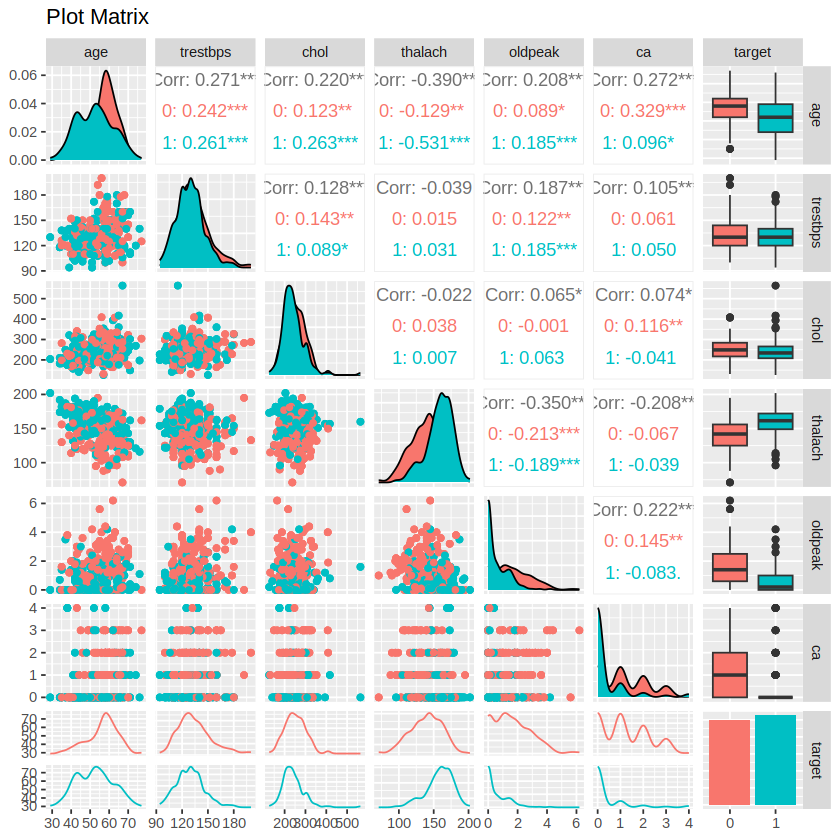

In [11]:
library(ggplot2)
install.packages("GGally")
library(GGally)

plot_matrix <- ggpairs(
  heart_data,
  aes(color = target),
  lower = list(continuous = "points", combo = "facetdensity"),
  diag = list(continuous = "density"),
  title = "Plot Matrix"
)

plot_matrix

Graph 3.0: Visualizing the relationship between variables

### 3.9 Discussing the relatioship between variables ###

From the boxplot section we can identify that thalac, trestbps and chol appear to be most distinguished between positive and negative to Thalassemia, meaning these variables are likely to prove most valuable in our model.

## 4.0 Forward Selection ##

Forward Selection will allow us to determine the predictors that result in the highest level of accuracy. 

In [12]:
names <- colnames(heart_data |> select(-target))
head(names)

#target will be separated from predictors with "~" and individual predictors separated by "+"
formula <- paste("target", "~", paste(names, collapse = "+"))
formula

[1] "age"      "trestbps" "chol"     "thalach"  "oldpeak"  "ca"

[1] "target ~ age+trestbps+chol+thalach+oldpeak+ca"

This will serve as our template for the forward selection.

In [13]:
set.seed(2023) 

# creates an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# creates a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
heart_vfold <- vfold_cv(heart_data, v = 5, strata = target)

# stores the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("target", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        heart_recipe <- recipe(as.formula(model_string), 
                                data = heart_data) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(heart_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = heart_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,target ~ chol,0.7570758
2,target ~ chol+thalach,0.9814775
3,target ~ chol+thalach+trestbps,0.9912052
4,target ~ chol+thalach+trestbps+oldpeak,0.9882925
5,target ~ chol+thalach+trestbps+oldpeak+ca,0.9912052
6,target ~ chol+thalach+trestbps+oldpeak+ca+age,0.9882925


Table 4.0: Predictors with highest accuracy in predicting target

From the forward selection, we can see that the three predictors we chose result in a highest accuracy, so we will choose the predictor variables of `chol`, `thalach` and `trestbps` in our model.

### 4.1 Accuracy Plot from Forward Selection ###

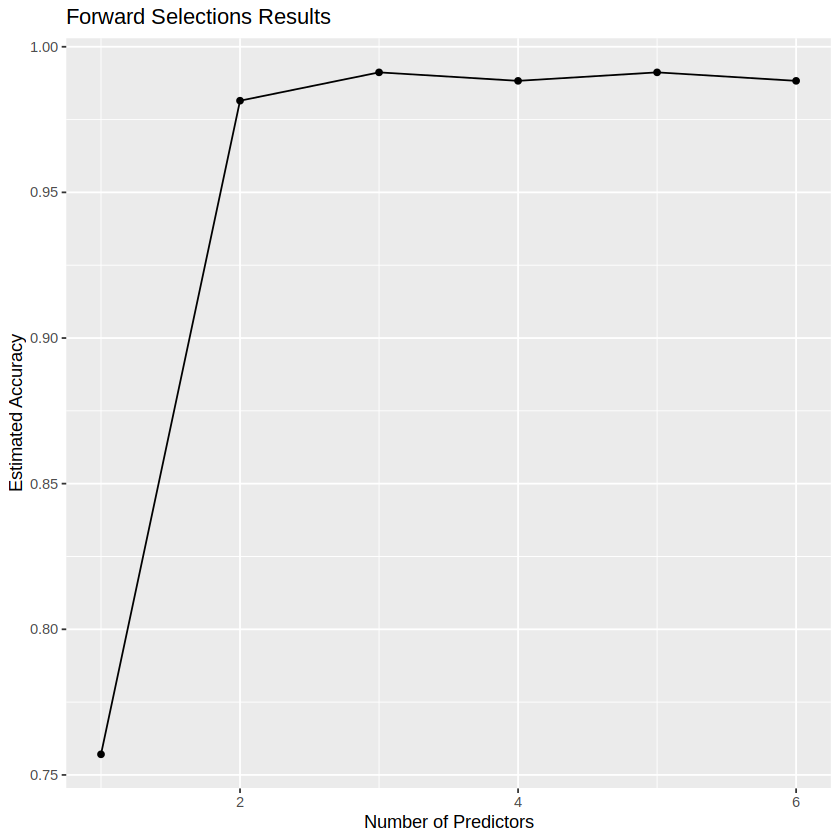

In [14]:
accuracy_plot <- accuracies |>
ggplot(aes(x = size, y = accuracy)) +
geom_line() +
geom_point() +
labs(x = "Number of Predictors", y = "Estimated Accuracy") +
ggtitle("Forward Selections Results") 

accuracy_plot

Graph 4.0: Accuracy of model based on number of variables

The graph confirms that after 3 predictors the accuracy does not increase meaningfully, suggesting that 3 predictors will be most useful for our model (as additional variables will only add noise).

## 5.0 Tuning K-NN Classifier ##

In [15]:
set.seed(2023) 
# set the number of fold
heart_vfold <- vfold_cv(heart_train, v = 10, strata = target)

# create recipe
heart_recipe <- recipe(target ~ chol + thalach + trestbps, data = heart_train) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())

# create specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

# range of k values for tuning
# 28 is the sqrt of training set sample size
k_vals <- tibble(neighbors = seq(from = 1, to = 28, by = 2))

# create workflow
knn_results <- workflow() |>
                add_recipe(heart_recipe) |>
                add_model(knn_spec) |>
                tune_grid(resamples = heart_vfold, grid = k_vals) |>
                collect_metrics()
# accuracy
heart_accuracies <- knn_results |>
                filter(.metric == "accuracy")

heart_accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9608300,10,0.008040495,Preprocessor1_Model01
3,accuracy,binary,0.8331646,10,0.015362819,Preprocessor1_Model02
5,accuracy,binary,0.7135628,10,0.018772777,Preprocessor1_Model03
7,accuracy,binary,0.7511471,10,0.013357200,Preprocessor1_Model04
9,accuracy,binary,0.7369771,10,0.013457192,Preprocessor1_Model05
11,accuracy,binary,0.7265520,10,0.009333047,Preprocessor1_Model06
13,accuracy,binary,0.7239204,10,0.011490820,Preprocessor1_Model07
15,accuracy,binary,0.7109649,10,0.011946586,Preprocessor1_Model08
17,accuracy,binary,0.7004049,10,0.010272281,Preprocessor1_Model09


Table 5.0: Preview of accuracy based on number of k neighbors

### Plot of estimated accuracy versus the number of neighbors ###

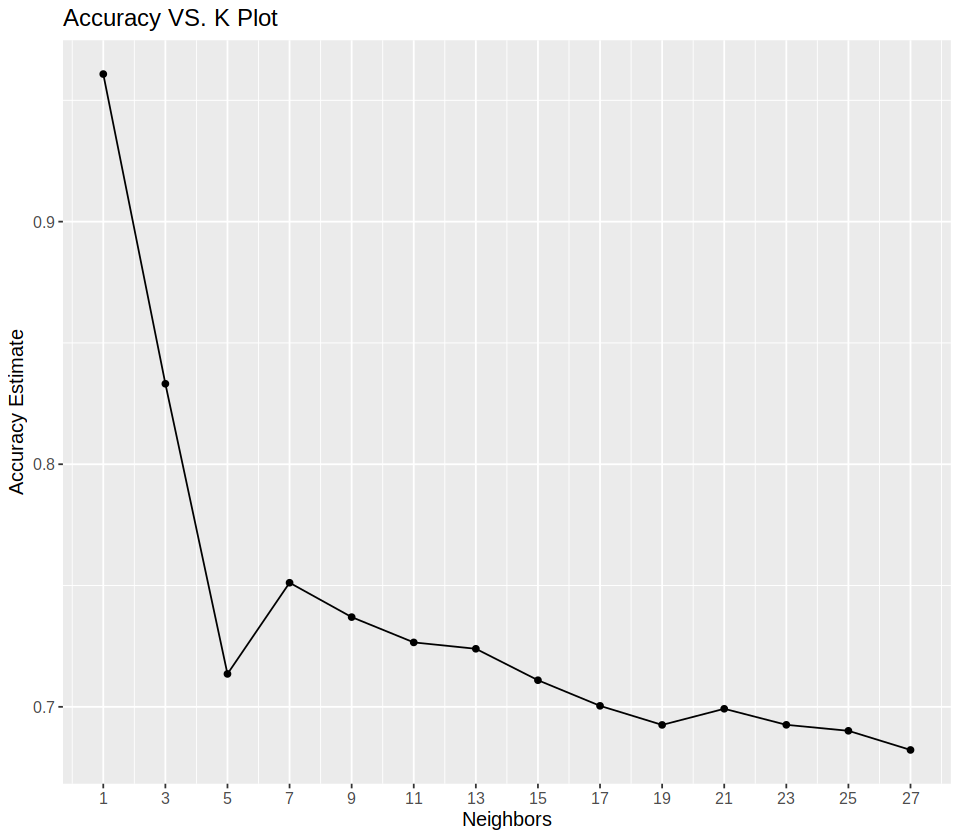

In [16]:
options(repr.plot.width = 8, repr.plot.height = 7)

accuracy_vs_k <- ggplot(heart_accuracies, aes(x = neighbors, y = mean)) +
                geom_point() +
                geom_line() +
                labs(x = "Neighbors", y = "Accuracy Estimate") +
                ggtitle("Accuracy VS. K Plot") +
                scale_x_continuous(breaks = seq(1,28, by = 2)) +
                theme(text = element_text(size = 12))

accuracy_vs_k

Graph 5.0: Accuracy of model based on k value of choice

Based on the above analysis and plot, since the accuracy score for `k=1` is highest from cross-validation, we would be choosing `k=1` for our model analysis.

## 6.0 Building the Model ##

Now, we build our model specification with neighbors = 1 which is our best value for K and  pass the model specification and the training data set to the fit() function.

In [17]:
set.seed(2023) 

#make model specification
heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 1) |>
       set_engine("kknn") |>
       set_mode("classification")

#fit the model to the data
heart_fit <- workflow() |>
             add_recipe(heart_recipe) |>
             add_model(heart_spec) |>
            fit(data = heart_train)
heart_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(1,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.02213542
Best kernel: rectangular
Best k: 1

### 6.1 Making Predictions ###

Now, we use our final model to predict on the test dataset.

In [18]:
set.seed(2023) 

#predict the target variable
heart_predictions <- predict(heart_fit, heart_test) |>
                        bind_cols(heart_test)

head(heart_predictions)

.pred_class,age,trestbps,chol,thalach,oldpeak,ca,target
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,58,114,318,140,4.4,3,0
0,46,120,249,144,0.8,0,0
0,51,140,298,122,4.2,3,0
0,54,124,266,109,2.2,1,0
0,61,145,307,146,1.0,0,0
1,44,130,233,179,0.4,0,1


Table 6.0: Preview of predictions based on our model

## 7.0 Evaluating the Prediction ##

Having created a prediction model, we must now evaluate its viability as a method for predicting heart disease in future patients.

### 7.1 Accuracy ### 

First, we look at the accuracy of the mode, i.e. the proportion of successful predictions made by the model.

In [19]:
heart_accuracy = heart_predictions |>
  metrics(truth = target, estimate = .pred_class) |>
  filter(.metric == "accuracy")

heart_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9883268


Table 7.0: Accuracy of the model

The accuracy reported by the model is 99%, a high result, but one that we need to understand the context of our accuracy metric.

### 7.2 Confusion Matrix ###

To do so, we look at the relative accuracy of the model when predicting the presence or absence of disease correctly through a confusion matrix. In the case of predicting heart disease it is more desirable to decrease the number of false negatives even at the cost of a few more false positives.

In [20]:

heart_conf = heart_predictions |>
    conf_mat(truth = target, estimate = .pred_class)

heart_conf

          Truth
Prediction   0   1
         0 122   0
         1   3 132

Table 7.1: Confusion Matrix for the model

The above confusion matrix suggests that the model correctly predicted disease at every occurrence, and only flagged a false positive 3 times. This is very positive as it means that our model is more likely to overestimate cases of disease rather than the inverse, a desirable outcome in this scenario.

With the confusion matrix, we can further calculate the precision and recall of the model.

In [21]:
heart_precision = 132/135
print('Model precision: ')
heart_precision

heart_recall = 132/132
print('Model recall: ')
heart_recall

[1] "Model precision: "


[1] 0.9777778

[1] "Model recall: "


[1] 1

As indicated above, the high recall of the model is arguably more relevant than the accuracy. Although the model is accurate "only" 99% of the time, it correctly identifies disease 100% of the time, making it a very viable option for disease prevention.

The fact that only 98% of the cases it identifies as positive are is no major concern: although we want to minimize false positives for client reassurance, it is better to wrongly flag a potential case of heart disease then let an actual case slip.

### 7.3 Plotting our values for chol vs. thalach ###

.pred_class,age,trestbps,chol,thalach,oldpeak,ca,target
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,58,114,318,140,4.4,3,0
0,46,120,249,144,0.8,0,0
0,51,140,298,122,4.2,3,0
0,54,124,266,109,2.2,1,0
0,61,145,307,146,1.0,0,0
1,44,130,233,179,0.4,0,1


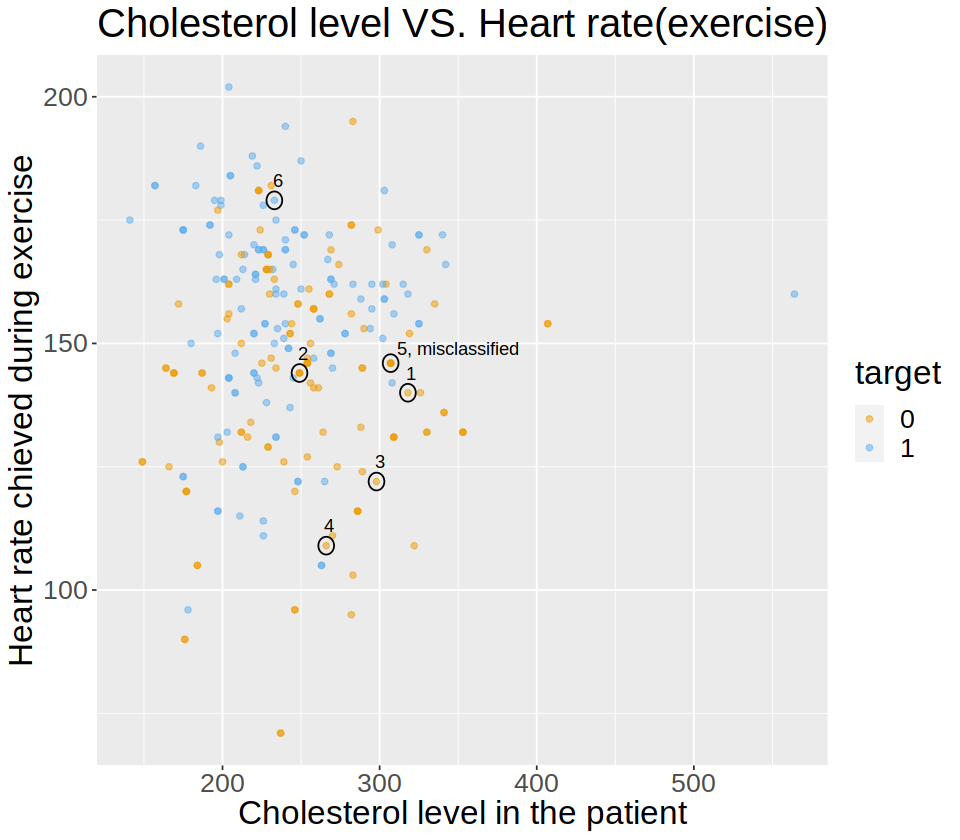

In [22]:
options(repr.plot.width = 8, repr.plot.height = 7)

head(heart_predictions)

# head of the heart_predictions
point1 <- c(318, 140)
point2 <- c(249, 144)
point3 <- c(298, 122)
point4 <- c(266,109)
point5 <- c(307,146) # misclassified target
point6 <- c(233,179)

heart_sp <- heart_predictions |>
  ggplot(aes(x = chol, y = thalach, color = target)) +
  geom_point(alpha = 0.5) +
  labs(color = "target", x = "Cholesterol level in the patient", y = "Heart rate chieved during exercise") +
  scale_color_manual(values = c("orange2", "steelblue2")) + 
  ggtitle("Cholesterol level VS. Heart rate(exercise)") +
  theme(text = element_text(size = 12)) +
  annotate("path", 
                 x=point1[1] + 5*cos(seq(0,2*pi,length.out=100)),
                 y=point1[2] + 1.8*sin(seq(0,2*pi,length.out=100))) +
        annotate("text", x = 320, y =  144, label = "1") +
        annotate("path",
                 x=point2[1] + 5*cos(seq(0,2*pi,length.out=100)),
                 y=point2[2] + 1.8*sin(seq(0,2*pi,length.out=100))) +
        annotate("text", x = 251, y =  148, label = "2") +
        annotate("path",
                 x=point3[1] + 5*cos(seq(0,2*pi,length.out=100)),
                 y=point3[2]+1.8*sin(seq(0,2*pi,length.out=100))) +
        annotate("text", x = 300, y =  126, label = "3") +
        theme(text = element_text(size = 20)) +
  annotate("path", 
                 x=point4[1] + 5*cos(seq(0,2*pi,length.out=100)),
                 y=point4[2] + 1.8*sin(seq(0,2*pi,length.out=100))) +
        annotate("text", x = 268, y =  113, label = "4") +
        annotate("path",
                 x=point5[1] + 5*cos(seq(0,2*pi,length.out=100)),
                 y=point5[2] + 1.8*sin(seq(0,2*pi,length.out=100))) +
        annotate("text", x = 350, y =  149, label = "5, misclassified") +
        annotate("path",
                 x=point6[1] + 5*cos(seq(0,2*pi,length.out=100)),
                 y=point6[2]+1.8*sin(seq(0,2*pi,length.out=100))) +
        annotate("text", x = 235, y =  183, label = "6")

heart_sp


Table 7.2: Preview of predicted values

Graph 7.0: Plotting our data based on two of our chosen predictors: chol and thalac

We've identified in the table 6 test datapoints. Of the 6, all but one are accurate, with dot 5 standing out as having been misclassified. This highlights visually the effectiveness of our model, given the complexity of the data it is working with.

This confirms our choice of k=1, as it was highly effective.

## 8.0 Discussion ##
### 8.1 Summary and Expectations ###
From our high accuracy, precision, and recall values, we know that our 3 predictors are effective at classifying whether an individual has Thalassemia. We expected this as existing medical research guided our predictor selection, causing us to expect a lower value for trestbps to be an indicator of heart disease (Wood 2009, 82). Similarly, we expected decreased maximum heart rate to be an indicator of Thalassemia (Sohn et al. 2013, 193)  Before our exploratory data analysis, we expected to find that age, trestbps, chol, oldpeak, thalach and ca would all be valuable predictors for heart disease. However, in our scatterplot matrix visualizing the training data, we can see that chol, thalach, and trestbps are the only variables that have significant differences in the distributions for those having Thalassemia and those unaffected. Using forward selection, we verified that these three predictors are the most effective as they have the three highest accuracies. Therefore, we removed the other predictors as accurate predictions could be made without them, and removing them would reduce noise and make our model simpler.

### 8.2 Impact ###
Our model proves to be useful for predicting when a new patient has Thalassemia to start treatment sooner, which would improve the patient’s well-being. The model could be implemented in hospitals, reducing wait time for patients who have not yet been diagnosed with Thalassemia. This model is very useful because we can see which factors indicate heart disease and try to prevent them using this information. Furthermore, the values of the predictors can easily be measured in common and inexpensive medical tests by medical professionals. In the long run, using classification models to predict heart disease could reduce healthcare costs and contribute to the development of prevention measures.

### 8.3 Future Questions ###
In the future, we could collect a larger training dataset to train the model to make it more accurate. Once the model is optimized, we could expand our findings to answer further questions such as by investigating which factor is the most significant predictor of Thalassemia. 


## 9.0 References ##

Benz, Edward J. “Introduction to the Thalassemia Syndromes: Molecular Medicine’s Index Case.” Thalassemia 37, no. 2 (April 1, 2023): 245–59. https://doi.org/10.1016/j.hoc.2022.11.001.

Foong, Wai Cheng, C Khai Loh, Jacqueline J Ho, and Doris Sc Lau. “Foetal Haemoglobin Inducers for Reducing Blood Transfusion in Non-Transfusion-Dependent Beta-Thalassaemias.” Edited by Cochrane Cystic Fibrosis and Genetic Disorders Group. Cochrane Database of Systematic Reviews 2023, no. 1 (January 13, 2023). doi:10.1002/14651858.CD013767.pub2

Kottke-Marchant, Kandice, and Bruce H. Davis. Laboratory Hematology Practice. Chichester, West Sussex, UK: Blackwell Pub., 2012.

Janosi, Andras, William Steinbrunn, Matthias Pfisterer, and Robert Detrano. “Heart Disease.” UCI Machine Learning Repository, June 30, 1988. Kaggle. https://doi.org/10.24432/C52P4X.

Merkeley, Hayley, and Lauren Bolster. “Thalassemia.” Canadian Medical Association Journal 192, no. 41 (October 13, 2020): E1210–E1210. doi:10.1503/cmaj.191613.

Sohn, Eugene Y., Roberta Kato, Leila J. Noetzli, Aakanksha Gera, Thomas Coates, Paul Harmatz, Thomas G. Keens, and John C. Wood. “Exercise Performance in Thalassemia Major: Correlation with Cardiac Iron Burden.” American Journal of Hematology 88, no. 3 (2013): 193–97. https://doi.org/10.1002/ajh.23370. 

Wood, John C. “Cardiac Complications in Thalassemia Major.” Hemoglobin 33, no. sup1 (2009). https://doi.org/10.3109/03630260903347526. 

Timbers, Tiffany-Anne, Trevor Campbell, and Melissa Lee. “Forward Selection in R.” Essay. In Data Science: A First Introduction. Boca Raton: CRC Press, Taylor &amp; Francis Group, 2022. 